# Модуль №2
<b>Тема: Дослідження класифікатора на основі нейронних мереж прямого поширення (FeedFoward Neural Networks).</b><br/>
<b>Студент: Чижовська Зоряна</b><br/>
<b>Група: КНм-11</b><br/>

<b>Варіант №20</b><br/>
<font color = green>
## Cat vs Noncat data set
</font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from scipy.stats import logistic
import h5py # common package to interact with a dataset that is stored on an H5 file.
import os
cwd= os.getcwd() # current working directory
path = os.path.join(cwd,'data') 

In [2]:
def load_dataset():
    file_name = os.path.join(path , 'train_catvnoncat.h5')
    train_dataset = h5py.File(file_name, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    Y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels
    
    file_name = os.path.join(path , 'test_catvnoncat.h5')
    test_dataset = h5py.File(file_name, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    Y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = ['Non-Cat','Cat']
    
    Y_train = Y_train.reshape(-1,1)
    Y_test = Y_test.reshape(-1,1)
    
    return X_train, Y_train, X_test, Y_test, classes

In [3]:
X_train,Y_train, X_test, Y_test, classes = load_dataset()

<IPython.core.display.Javascript object>


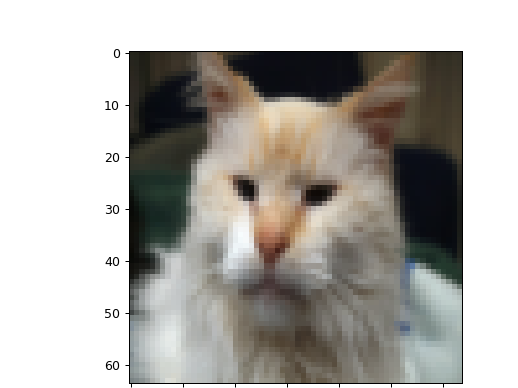

y = [1], it's a 'Cat' picture.


In [4]:
index = 27
plt.figure()
plt.imshow(X_train[index])
print ("y = " + str(Y_train[index,:]) + ", it's a '" + classes[np.squeeze(Y_train[index,:])] +  "' picture.")

In [5]:
# Reshape the training and test examples 
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1) # The "-1" makes reshape flatten the remaining dimensions
X_test_flatten =  X_test.reshape(m_test, -1)


In [6]:
# Standardize data to have feature values between 0 and 1.
X_train_scaled = X_train_flatten/255.
X_test_scaled = X_test_flatten/255.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Normalize
X_train_norm = sc.fit_transform(X_train_scaled)
X_test_norm = sc.fit_transform(X_test_scaled)

In [7]:
Y_train = np.squeeze(Y_train)
Y_test = np.squeeze(Y_test)
print ('Y_train.shape=', Y_train.shape)
print ('Y_test.shape=', Y_test.shape)
print ('X_train_scaled.shape=', X_train_scaled.shape)

Y_train.shape= (209,)
Y_test.shape= (50,)
X_train_scaled.shape= (209, 12288)


In [8]:
from sklearn.neural_network import MLPClassifier

<font color = green>

###  Shallow Neural Network  (1 Layer)

</font>



In [24]:
solverValue = 'sgd'
activationValue = 'relu'
maxIterValue = 500
    
clf = MLPClassifier(solver=solverValue, activation=activationValue, max_iter=maxIterValue)
clf.fit(X_train_norm, Y_train)

print("~" * 40)
print("1 Layer NM train accuracy= {:.3%}".format(clf.score (X_train_norm, Y_train)))
print("1 Layer NM test accuracy= {:.3%}".format(clf.score (X_test_norm, Y_test)))
print("~" * 40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
1 Layer NM train accuracy= 100.000%
1 Layer NM test accuracy= 64.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<font color = green>

###  Shallow MLP Neural Network  (2 Layers)

</font>



In [26]:
solverValue = 'sgd'
activationValues =  ['identity', 'relu']
maxIterValue = 500

for activation in activationValues:
    clf = MLPClassifier((3,3), solver=solverValue, activation=activation, max_iter=maxIterValue)
    clf.fit(X_train_norm, Y_train)    
    print("~" * 40)
    print(f"Activation is {activation}")
    print("2 Layers NM train accuracy= {:.3%}".format(clf.score (X_train_norm,Y_train)))
    print("2 Layers NM test accuracy= {:.3%}".format(clf.score (X_test_norm,Y_test)))

print("~" * 40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Activation is identity
2 Layers NM train accuracy= 100.000%
2 Layers NM test accuracy= 64.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Activation is relu
2 Layers NM train accuracy= 89.952%
2 Layers NM test accuracy= 54.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<font color = green>

###  3 Layers Neural Network 

</font>

In [13]:
solverValue = 'sgd'
activationValues =  ['identity', 'relu', 'relu']
maxIterValue = 500

for activation in activationValues:
    clf = MLPClassifier((20,7,10), solver=solverValue, activation=activation, max_iter=maxIterValue)
    clf.fit(X_train_norm, Y_train)
    print("~" * 40)
    print(f"Activation is {activation}")
    print("3 Layers NM train accuracy= {:.3%}".format(clf.score (X_train_norm, Y_train)))
    print("3 Layers NM test accuracy= {:.3%}".format(clf.score (X_test_norm, Y_test)))

print("~" * 40)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Activation is identity
3 Layers NM train accuracy= 100.000%
3 Layers NM test accuracy= 62.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Activation is relu
3 Layers NM train accuracy= 100.000%
3 Layers NM test accuracy= 76.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Activation is relu
3 Layers NM train accuracy= 98.086%
3 Layers NM test accuracy= 70.000%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


<font color = green>

###  Compare with SVM 

</font>

In [23]:
from sklearn.svm import SVC

In [24]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, Y_train)
print("Support Vector Classification train accuracy= {:.3%}".format(clf.score (X_train_norm, Y_train)))
print("Support Vector Classification test accuracy= {:.3%}".format(clf.score (X_test_norm, Y_test)))

Support Vector Classification train accuracy= 66.986%
Support Vector Classification test accuracy= 34.000%
